/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


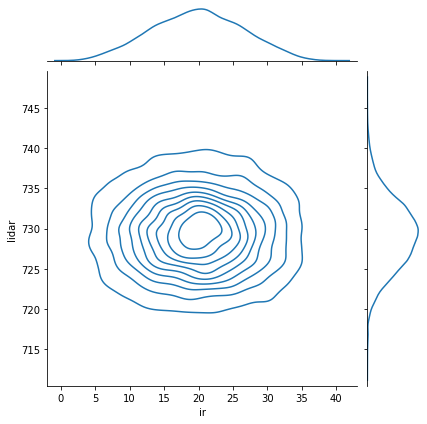

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("sensor_data_700.txt", delimiter=" ",
                   header=None, names=["date", "time", "ir", "lidar"])

d = data[(data["time"] < 160000) & (data["time"] >= 120000)]
d = d.loc[:, ["ir", "lidar"]]

sns.jointplot(d["ir"], d["lidar"], d, kind="kde")
plt.show()

In [6]:
print("光センサの計測値の分散：", d.ir.var())
print("LIDARセンサの計測値の分散：", d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()

a = diff_ir * diff_lidar
print("共分散：", sum(a) / (len(d) - 1))

d.mean()

光センサの計測値の分散： 42.117126367699505
LIDARセンサの計測値の分散： 17.702026469211596
共分散： -0.31677803385436953


ir        19.860247
lidar    729.311958
dtype: float64

In [7]:
d.cov()

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


In [9]:
from scipy.stats import multivariate_normal

irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values)

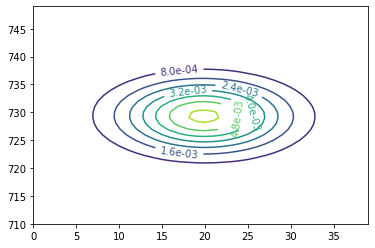

In [17]:
import numpy as np

x, y = np.mgrid[0:40, 710:750]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
cont = plt.contour(x, y, irlidar.pdf(pos))
cont.clabel(fmt="%1.1e")

plt.show()

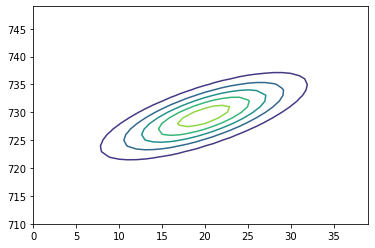

In [20]:
c = d.cov().values + np.array([[0, 20], [20, 0]])
tmp = multivariate_normal(mean=d.mean().values.T, cov=c)
cont = plt.contour(x, y, tmp.pdf(pos))
plt.show()